# 대중교통 데이터 분석

## 데이터 수집
---

1. 티미니 홈페이지로 진입 https://pay.tmoney.co.kr/index.dev
2. 이용안내 클릭
3. 대중교통 통계자료 클릭
4. 월간 교통카드 통계자료 파일 다운

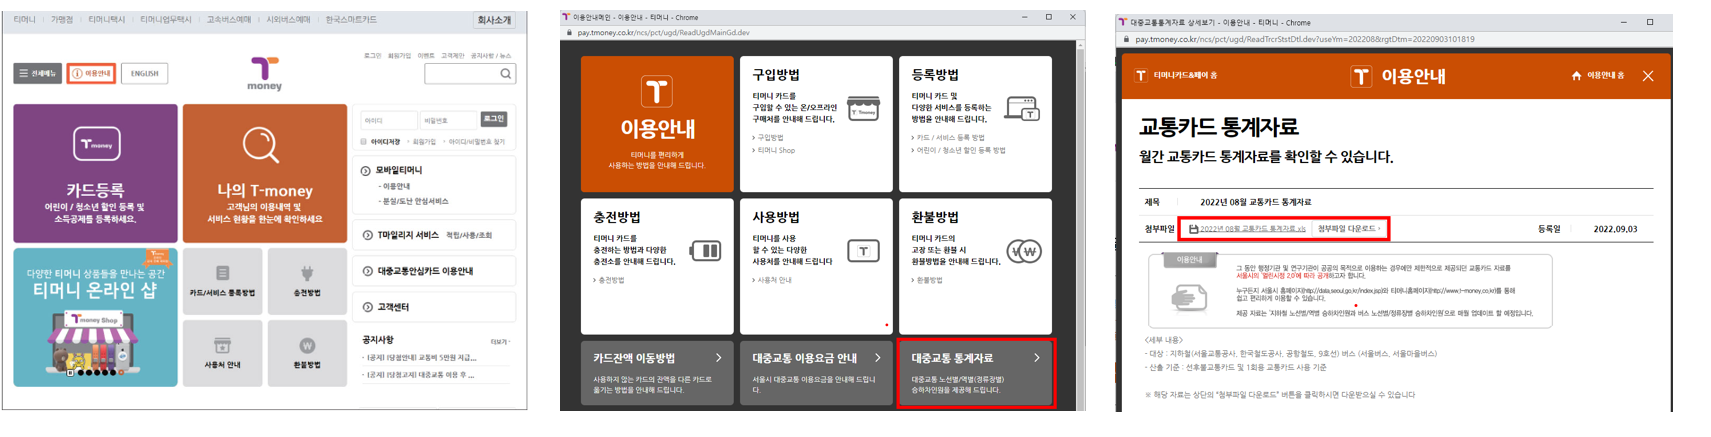

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 1. 데이터 확인
---

In [1]:
#라이브러리 로드
import pandas as pd

In [6]:
#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,"1,355,284","1,285,303","211,835","201,772",2023-07-03 08:56:50
1,2023-06,1호선,151,시청,"643,718","653,701","95,097","93,981",2023-07-03 08:56:50
2,2023-06,1호선,152,종각,"939,341","932,306","144,553","136,786",2023-07-03 08:56:50
3,2023-06,1호선,153,종로3가,"483,658","434,093","304,455","282,796",2023-07-03 08:56:50
4,2023-06,1호선,154,종로5가,"468,448","468,041","261,653","251,271",2023-07-03 08:56:50


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     614 non-null    object
 1   호선명     614 non-null    object
 2   역ID     614 non-null    int64 
 3   지하철역    614 non-null    object
 4   유임승차    614 non-null    object
 5   유임하차    614 non-null    object
 6   무임승차    614 non-null    object
 7   무임하차    614 non-null    object
 8   작업일시    614 non-null    object
dtypes: int64(1), object(8)
memory usage: 43.3+ KB


In [8]:
#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV',thousands=',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50
1,2023-06,1호선,151,시청,643718,653701,95097,93981,2023-07-03 08:56:50
2,2023-06,1호선,152,종각,939341,932306,144553,136786,2023-07-03 08:56:50
3,2023-06,1호선,153,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50
4,2023-06,1호선,154,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     614 non-null    object
 1   호선명     614 non-null    object
 2   역ID     614 non-null    int64 
 3   지하철역    614 non-null    object
 4   유임승차    614 non-null    int64 
 5   유임하차    614 non-null    int64 
 6   무임승차    614 non-null    int64 
 7   무임하차    614 non-null    int64 
 8   작업일시    614 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.3+ KB


In [10]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,614.000000,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,1924.058632,2.754875e+05,2.746448e+05,60283.765472,59612.382736
std,1206.574376,2.774772e+05,2.833062e+05,49018.489470,48664.899621
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1203.250000,9.460600e+04,8.907700e+04,25523.750000,26124.000000
50%,1822.500000,2.024105e+05,1.891765e+05,48049.500000,46517.500000
75%,2634.750000,3.629550e+05,3.657775e+05,77630.750000,76371.250000
max,4713.000000,2.123826e+06,2.092841e+06,304455.000000,295752.000000


## 2. 유임 승차 비율이 가장 높은 역은 어디일까?
---
__유임 승차 비율이 가장 높은 역은 어디일까?__

이 질문을 해결하기 위한 알고리즘을 잠시 생각해보자. 

```
rate = 유임승차인원 / 무임승차인원 + 유임승차인원
```

1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 각 역의 비율(rate)를 계산한다.
3. 비율이 가장 높은 역을 찿는다.
4. 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다.


In [11]:
df['유임승차'] / (df['무임승차'] + df['유임승차'])

0      0.864825
1      0.871284
2      0.866635
3      0.613691
4      0.641621
         ...   
609    0.717271
610    0.676979
611    0.759413
612    0.762947
613    0.599318
Length: 614, dtype: float64

In [12]:
df['유임승차비율'] = df['유임승차'] / (df['무임승차'] + df['유임승차'])

In [13]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50,0.864825
1,2023-06,1호선,151,시청,643718,653701,95097,93981,2023-07-03 08:56:50,0.871284
2,2023-06,1호선,152,종각,939341,932306,144553,136786,2023-07-03 08:56:50,0.866635
3,2023-06,1호선,153,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50,0.613691
4,2023-06,1호선,154,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50,0.641621


In [14]:
df.sort_values(by=['유임승차비율'],ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
519,2023-06,7호선,2756,신중동,1,0,0,0,2023-07-03 08:56:50,1.000000
266,2023-06,일산선,1949,지축,13,0,0,0,2023-07-03 08:56:50,1.000000
440,2023-06,6호선,2615,연신내,16,0,0,0,2023-07-03 08:56:50,1.000000
518,2023-06,7호선,2755,춘의,1,0,0,0,2023-07-03 08:56:50,1.000000
517,2023-06,7호선,2753,까치울,2,0,0,0,2023-07-03 08:56:50,1.000000
...,...,...,...,...,...,...,...,...,...,...
7,2023-06,1호선,157,제기동,231277,219395,275258,295752,2023-07-03 08:56:50,0.456586
345,2023-06,경춘선,1324,굴봉산,2275,2003,2962,2867,2023-07-03 08:56:50,0.434409
296,2023-06,중앙선,1220,지평,909,1215,1228,1238,2023-07-03 08:56:50,0.425363
208,2023-06,경원선,1916,소요산,31911,26053,57565,52221,2023-07-03 08:56:50,0.356643


```
* 무임승차가 0인 경우 유임승차비율이 1로 나타납니다. 
* 무임승차가 0이 아닌 경우로 한정해서 다시 정렬을 해야 할 듯....
```

In [17]:
df[df['무임승차'] > 0].sort_values(by='유임승차비율',ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
72,2023-06,3호선,321,충무로,55,0,1,0,2023-07-03 08:56:50,0.982143
18,2023-06,2호선,209,한양대,305324,337457,13874,14861,2023-07-03 08:56:50,0.956535
565,2023-06,공항철도 1호선,4203,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50,0.952169
48,2023-06,2호선,239,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50,0.950628
120,2023-06,경부선,1001,서울역,258515,80341,16266,3451,2023-07-03 08:56:50,0.940804
...,...,...,...,...,...,...,...,...,...,...
7,2023-06,1호선,157,제기동,231277,219395,275258,295752,2023-07-03 08:56:50,0.456586
345,2023-06,경춘선,1324,굴봉산,2275,2003,2962,2867,2023-07-03 08:56:50,0.434409
296,2023-06,중앙선,1220,지평,909,1215,1228,1238,2023-07-03 08:56:50,0.425363
208,2023-06,경원선,1916,소요산,31911,26053,57565,52221,2023-07-03 08:56:50,0.356643


```
* 충무로는 다소 유동인구 자체가 적은 역이므로 유임승차비율이 높게 나타났다.
* 유동인구가 많은 역을 대상으로 분석을 해야할 듯 싶음.....

```

In [19]:
(df['유임승차'] + df['무임승차']).describe()

count    6.140000e+02
mean     3.357712e+05
std      3.146823e+05
min      1.000000e+00
25%      1.247645e+05
50%      2.557495e+05
75%      4.414028e+05
max      2.280203e+06
dtype: float64

In [32]:
df['유임승차'].quantile(0.25)

94606.0

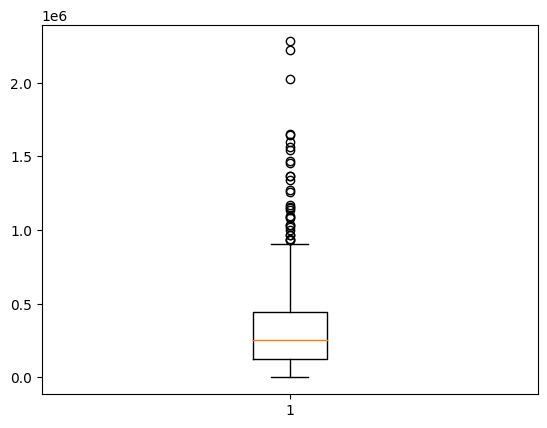

In [22]:
import matplotlib.pyplot as plt
plt.boxplot(df['유임승차'] + df['무임승차'])
plt.show()

```
* 극단적으로 적은 값을 제외하는 것으로 결정하여
기준값을 25%로 정하기로 했음. 이 기준 이상은 유동인구가 많다, 고로 비율을 계산하는데 방해 요소가 아니다 라고 판단해서...
25$ 기준점은 12만명으로
대략 10만명을 기준값으로 설정해서 필터링을 해봐야겠다.
```

In [25]:
df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='유임승차비율', ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
18,2023-06,2호선,209,한양대,305324,337457,13874,14861,2023-07-03 08:56:50,0.956535
565,2023-06,공항철도 1호선,4203,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50,0.952169
48,2023-06,2호선,239,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50,0.950628
120,2023-06,경부선,1001,서울역,258515,80341,16266,3451,2023-07-03 08:56:50,0.940804
567,2023-06,공항철도 1호선,4206,마곡나루(서울식물원),272965,263113,17475,17871,2023-07-03 08:56:50,0.939833
...,...,...,...,...,...,...,...,...,...,...
8,2023-06,1호선,158,청량리(서울시립대입구),345435,338983,261650,265212,2023-07-03 08:56:50,0.569006
594,2023-06,우이신설선,4705,화계,58993,52227,44754,45633,2023-07-03 08:56:50,0.568624
195,2023-06,경원선,1903,도봉산,132984,74978,120677,97260,2023-07-03 08:56:50,0.524259
9,2023-06,1호선,159,동묘앞,143230,148422,156934,157665,2023-07-03 08:56:50,0.477172


In [26]:
sub_df = df[(df['유임승차'] + df['무임승차']) > 100000].sort_values(by='유임승차비율', ascending=False)

In [27]:
sub_df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
18,2023-06,2호선,209,한양대,305324,337457,13874,14861,2023-07-03 08:56:50,0.956535
565,2023-06,공항철도 1호선,4203,홍대입구,392468,385660,19715,18568,2023-07-03 08:56:50,0.952169
48,2023-06,2호선,239,홍대입구,1926011,2092841,100030,97073,2023-07-03 08:56:50,0.950628
120,2023-06,경부선,1001,서울역,258515,80341,16266,3451,2023-07-03 08:56:50,0.940804
567,2023-06,공항철도 1호선,4206,마곡나루(서울식물원),272965,263113,17475,17871,2023-07-03 08:56:50,0.939833


In [31]:
#유임 승차 비율이 가장 높은 역은? 
line = sub_df.iloc[0,1]
subname = sub_df.iloc[0,3]
rate = sub_df.iloc[0,-1] * 100

print(f'유임 승차 비율이 가장 높은 역은? {subname} {line} {rate:.2f}%')

유임 승차 비율이 가장 높은 역은? 한양대 2호선 95.65%


```
유임 승차 비율이 가장 높은 역은? 한양대 2호선 95.65%
```

---

## 3. 유무임 승하차 인원이 가장 많은 역은 어디일까?
---
__유무임 승하차 인원이 가장 많은 역은 어디일까?__

유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾으면 되니까 다음과 같은 간단한 알고리즘을 생각할 수 있다.

1. 데이터를 읽어온다
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
3. 각각의 인원이 가장 많은 역을 출력한다.

In [1]:
#라이브러리 로드
import pandas as pd

#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV',thousands=',')
df.head()


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50
1,2023-06,1호선,151,시청,643718,653701,95097,93981,2023-07-03 08:56:50
2,2023-06,1호선,152,종각,939341,932306,144553,136786,2023-07-03 08:56:50
3,2023-06,1호선,153,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50
4,2023-06,1호선,154,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50


In [9]:
#유임승차가 가장 많은 역
charged_1 = df.sort_values(by=['유임승차'],ascending=False).iloc[0,[1,3,4]]

#유임하차가 가장 많은 역
charged_0 = df.sort_values(by=['유임하차'],ascending=False).iloc[0,[1,3,5]]

#무임승차가 가장 많은 역
nocharged_1 = df.sort_values(by=['무임승차'],ascending=False).iloc[0,[1,3,6]]

#무임하차가 가장 많은 역
nocharged_0 = df.sort_values(by=['무임하차'],ascending=False).iloc[0,[1,3,7]]

In [13]:
charged_1[0],charged_1[1],charged_1[2]

('2호선', '강남', 2123826)

In [14]:
print(f'유임승차 : {charged_1[0]} {charged_1[1]} {charged_1[2]}명')
print(f'유임하차 : {charged_0[0]} {charged_0[1]} {charged_0[2]}명')
print(f'무임승차 : {nocharged_1[0]} {nocharged_1[1]} {nocharged_1[2]}명')
print(f'무임하차 : {nocharged_0[0]} {nocharged_0[1]} {nocharged_0[2]}명')


유임승차 : 2호선 강남 2123826명
유임하차 : 2호선 홍대입구 2092841명
무임승차 : 1호선 종로3가 304455명
무임하차 : 1호선 제기동 295752명


```
유임승차 : 2호선 강남 2073808
유임하차 : 2호선 강남 2018576
무임승차 : 1호선 종로3가 277589
무임하차 : 1호선 제기동 282283
```

## 모든 역의 유무임 승하차 비율은 어떻게 될까
---
이번에는 데이터가 있는 모든 역에 대한 유무임 승하차 비율을 표현해보자.(4개역)

In [15]:
#라이브러리 로드
import pandas as pd

#데이터 로드
df = pd.read_csv('./data/subwayfee.CSV',thousands=',')
df.head()

#데이터 전처리



,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50
1,2023-06,1호선,151,시청,643718,653701,95097,93981,2023-07-03 08:56:50
2,2023-06,1호선,152,종각,939341,932306,144553,136786,2023-07-03 08:56:50
3,2023-06,1호선,153,종로3가,483658,434093,304455,282796,2023-07-03 08:56:50
4,2023-06,1호선,154,종로5가,468448,468041,261653,251271,2023-07-03 08:56:50


In [17]:
row = df.values[0]


In [25]:
df.iloc[0,4:8] # 시리즈 타입

유임승차    1355284
유임하차    1285303
무임승차     211835
무임하차     201772
Name: 0, dtype: object

([<matplotlib.patches.Wedge at 0x1dd75257f10>,
 [Text(0.19339214986856218, 1.0828663243305776, ''),
  Text(-0.6230774892850767, -0.9065177562222404, ''),
  Text(0.8868894140827823, -0.6507128146793325, ''),
  Text(1.0763934851050763, -0.2266650948499748, '')])

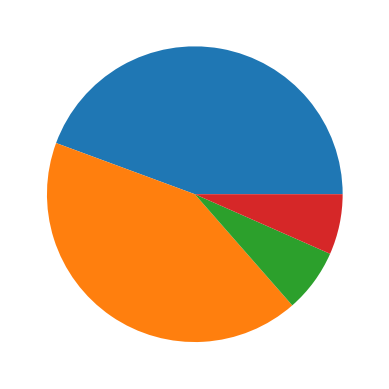

In [26]:
plt.pie(df.iloc[0,4:8]) # 시리즈도 먹네

In [18]:
row[4:8] #ndarray 타입이네

array([1355284, 1285303, 211835, 201772], dtype=object)

([<matplotlib.patches.Wedge at 0x1dd759f1060>,
 [Text(0.19339214986856218, 1.0828663243305776, ''),
  Text(-0.6230774892850767, -0.9065177562222404, ''),
  Text(0.8868894140827823, -0.6507128146793325, ''),
  Text(1.0763934851050763, -0.2266650948499748, '')])

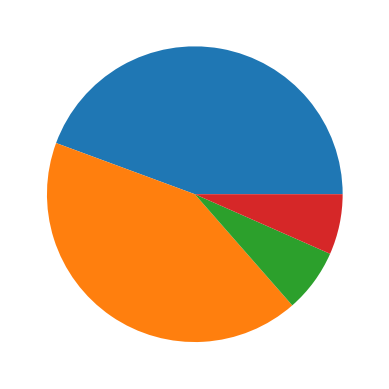

In [27]:
plt.pie(row[4:8])#ndarray 타입도 출력이 되네

In [23]:
row[4:8].tolist() # 파이썬의 리스트 타입

[1355284, 1285303, 211835, 201772]

([<matplotlib.patches.Wedge at 0x1dd6fb53520>,
 [Text(0.19339214986856218, 1.0828663243305776, ''),
  Text(-0.6230774892850767, -0.9065177562222404, ''),
  Text(0.8868894140827823, -0.6507128146793325, ''),
  Text(1.0763934851050763, -0.2266650948499748, '')])

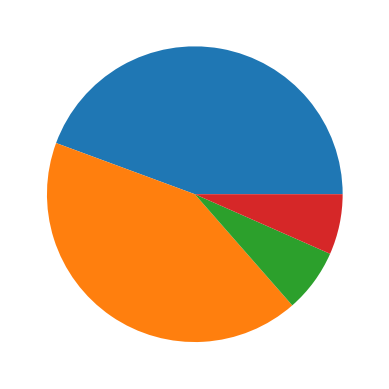

In [24]:
plt.pie(row[4:8].tolist()) # 리스트도 먹네

In [21]:
type(row[4:8])

numpy.ndarray

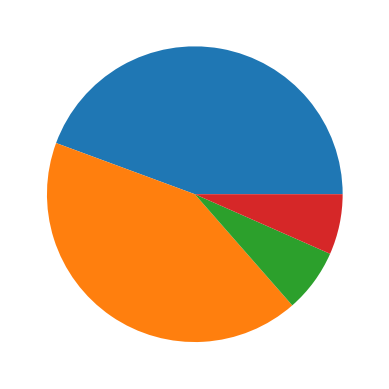

In [22]:
import matplotlib.pyplot as plt
plt.pie(row[4:8])
plt.show()

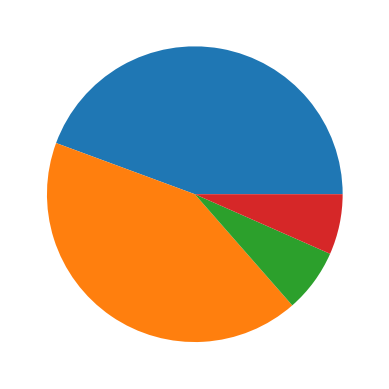

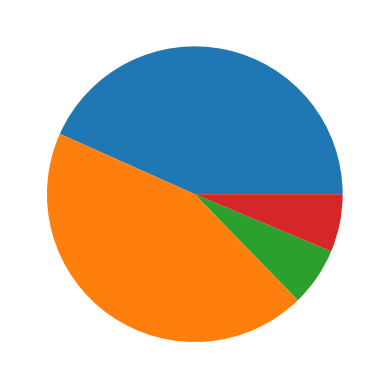

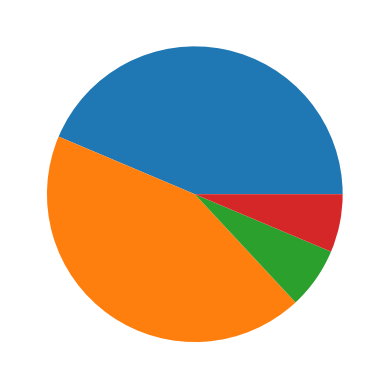

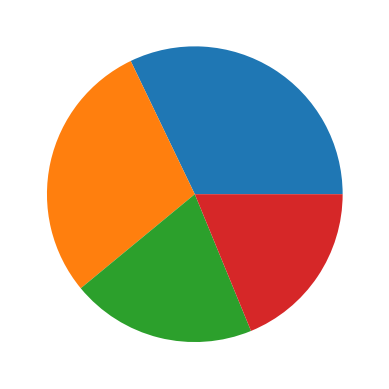

In [29]:
# 파이차트 그리기
# 각 역마다 유무임 승하차 비율 시각화
for i , row in enumerate(df.values):
    plt.pie(row[4:8])
    plt.show()

    if i == 3: break #일단 4개만 출력



```
**코드는 어떻게 보완하면 좋을까?**

1. 어떤 역에 대한 차트인지 정보가 부족하다.
2. 비율을 수치로 정확하게 나타내면 좋겠다.
3. 색상을 좀 더 예쁘게 바꾸고 싶을 수 있다.
```

In [ ]:
# plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
# #plt.rc('font', family='AppleGothic')     #맥
# plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

In [30]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2023-06,1호선,150,서울역,1355284,1285303,211835,201772,2023-07-03 08:56:50


In [34]:
df.columns[4:8].tolist()

['유임승차', '유임하차', '무임승차', '무임하차']

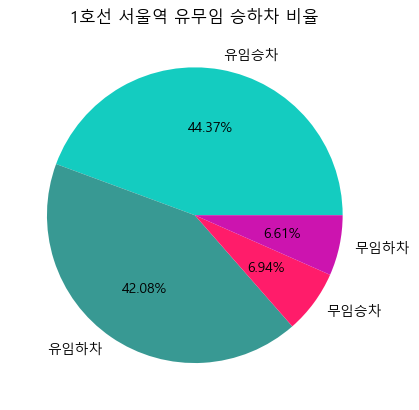

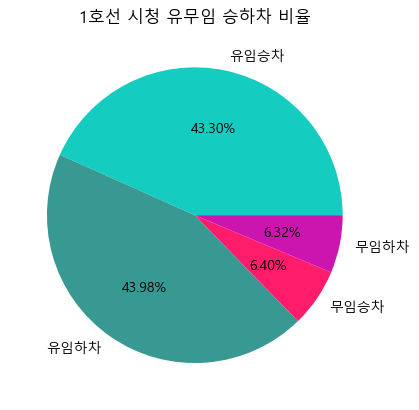

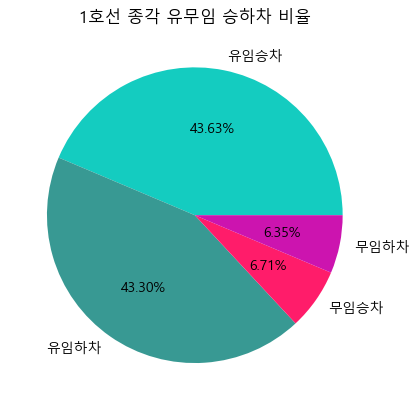

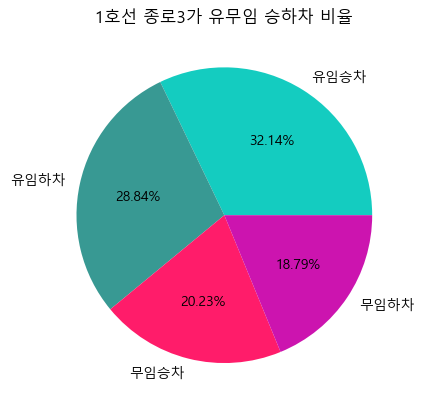

In [37]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
#plt.rc('font', family='AppleGothic')     #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

for i , row in enumerate(df.values):
    plt.pie(row[4:8], labels=df.columns[4:8].tolist() ,autopct='%.2f%%' ,colors=c )
    plt.title(f'{row[1]} {row[3]} 유무임 승하차 비율')
    plt.show()

    if i == 3: break #일단 4개만 출력

```
마지막으로 시각화한 자료를 이미지 파일로 저장하자. 
그래프를 이미지로 저장하려면 `savefig()` 함수를 사용하면 된다.
```

## 4. 그래프를 여러개 그리기

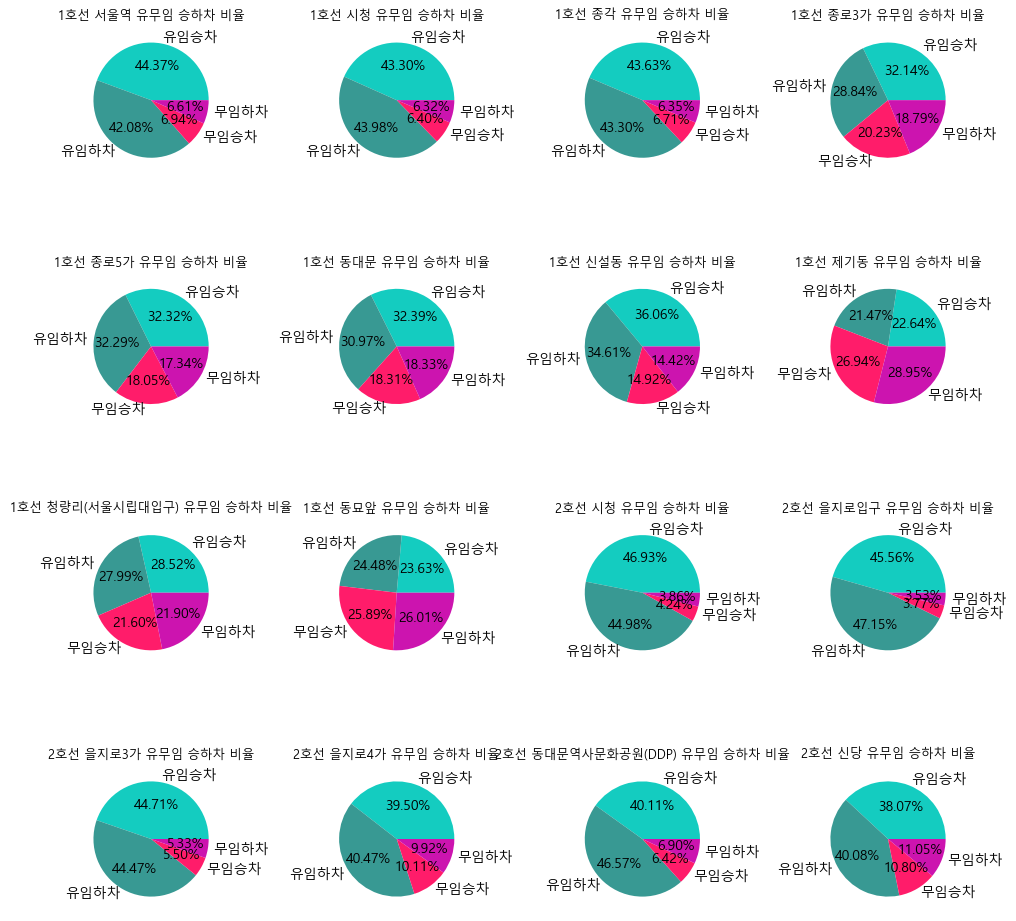

In [44]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
#plt.rc('font', family='AppleGothic')     #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.figure(figsize=(10,10))
for i , row in enumerate(df.values):

    plt.subplot(4,4,i+1) #subplot은 인덱스가 1부터 시작

    plt.pie(row[4:8], labels=df.columns[4:8].tolist() ,autopct='%.2f%%' ,colors=c )
    plt.title(f'{row[1]} {row[3]} 유무임 승하차 비율',fontdict={'size':9})
    
    if i+1 == 16: break #일단 4개만 출력

plt.tight_layout()
plt.show()